In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sys


In [3]:
Netflix = pd.read_csv('NFLX.csv')

In [5]:
Netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [6]:
Netflix.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2002-05-23    1.156429    1.242857    1.145714    1.196429    1.196429   
1     2002-05-24    1.214286    1.225000    1.197143    1.210000    1.210000   
2     2002-05-28    1.213571    1.232143    1.157143    1.157143    1.157143   
3     2002-05-29    1.164286    1.164286    1.085714    1.103571    1.103571   
4     2002-05-30    1.107857    1.107857    1.071429    1.071429    1.071429   
...          ...         ...         ...         ...         ...         ...   
4940  2022-01-05  592.000000  592.840027  566.880005  567.520020  567.520020   
4941  2022-01-06  554.340027  563.359985  542.010010  553.289978  553.289978   
4942  2022-01-07  549.460022  553.429993  538.219971  541.059998  541.059998   
4943  2022-01-10  538.489990  543.690002  526.320007  539.849976  539.849976   
4944  2022-01-11  536.989990  543.909973  530.070007  540.840027  540.840027   

       

In [7]:
Netflix.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4.945000e+03
mean,112.233039,113.907065,110.482113,112.247547,112.247547,1.662624e+07
std,167.105518,169.442852,164.604070,167.071583,167.071583,1.930246e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.928571,3.998571,3.855714,3.928571,3.928571,6.195700e+06
50%,23.910000,24.497143,23.411428,23.974285,23.974285,1.067290e+07
75%,141.389999,142.440002,139.770004,141.179993,141.179993,1.997660e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


<AxesSubplot:xlabel='High', ylabel='Density'>

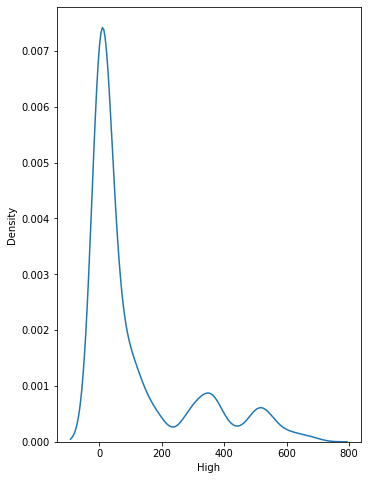

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.kdeplot(Netflix.High)

In [16]:
Netflix.High.mean()

113.90706514459048

<AxesSubplot:xlabel='Low', ylabel='Density'>

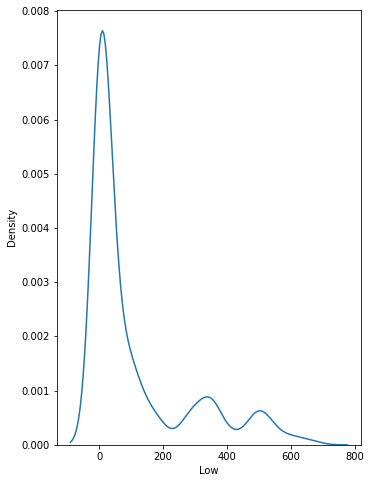

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.kdeplot(Netflix.Low)

In [14]:
Netflix.Low.mean()

110.4821131431749

<AxesSubplot:xlabel='Close', ylabel='Density'>

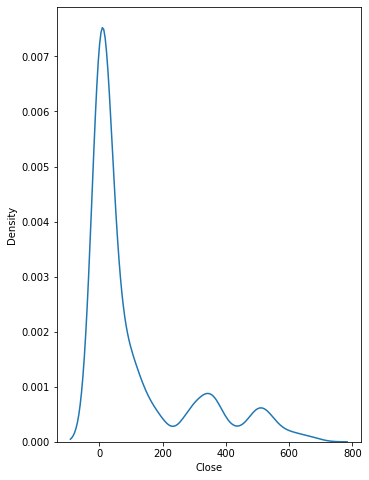

In [12]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.kdeplot(Netflix.Close)

In [15]:
Netflix.Close.mean()

112.24754690556117

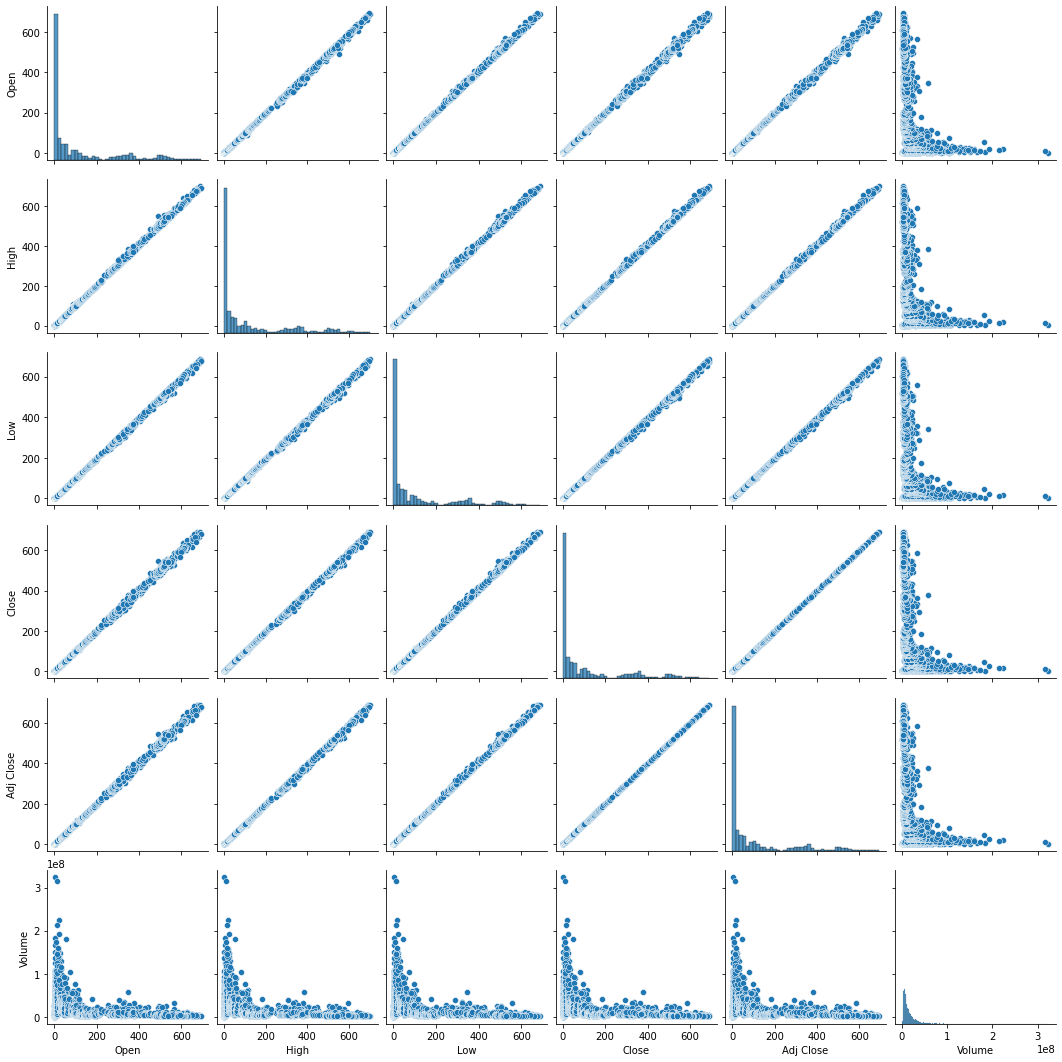

In [19]:
sns.pairplot(Netflix)

In [24]:
Netflix.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999872,0.999866,0.999718,0.999718,-0.260937
High,0.999872,1.000000,0.999831,0.999872,0.999872,-0.259694
Low,0.999866,0.999831,1.000000,0.999871,0.999871,-0.262132
Close,0.999718,0.999872,0.999871,1.000000,1.000000,-0.260817
Adj Close,0.999718,0.999872,0.999871,1.000000,1.000000,-0.260817
Volume,-0.260937,-0.259694,-0.262132,-0.260817,-0.260817,1.000000


In [52]:
import statsmodels.formula.api as smf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [53]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [54]:
formula = 'High ~ Low'
model = ols(formula = formula,data = Netflix).fit()
table = anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
Low,1.0,1.418987e+08,1.418987e+08,1.465049e+07,0.0
Residual,4943.0,4.787591e+04,9.685598e+00,NaN,NaN


In [55]:
formula = 'Open ~  High + Low + Close'
lm = smf.ols(formula = formula, data = Netflix).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.482e+07
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:45:42   Log-Likelihood:                -9816.0
No. Observations:                4945   AIC:                         1.964e+04
Df Residuals:                    4941   BIC:                         1.967e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0025      0.030      0.082      0.9